In [2]:
# Linear Regression: The line of best fit, with several data points

import pandas as pd 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


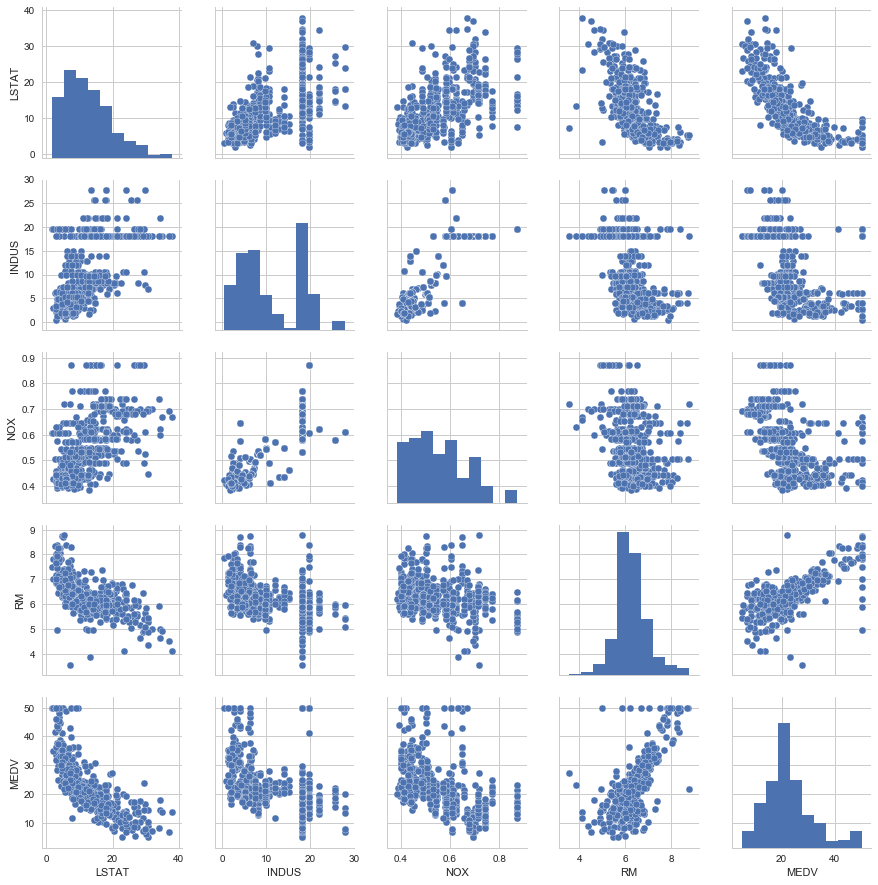

In [3]:
# VISUALIZING THE IMPORTANT CHARACTERISTICS OF A DATASET 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()

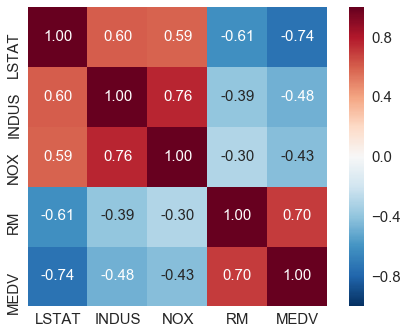

In [4]:
# pearson product-moment correlation coefficients 
# heatmap 
import numpy as np 
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [5]:
# IMPLEMENTING AN ORDINARY LEAST SQUARES LINEAR REGRESSION MODEL 
# > solving regression for regresion parameters with gradient descent

class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta 
        self.n_iter = n_iter 
        
    def fit(self, x, y):
        self.w_ = np.zeros(1 + x.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(x)
            errors = (y - output)
            self.w_[1:] += self.eta * x.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0 
            self.cost_.append(cost)
        return self 
    
    
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def predict(self, x):
        return self.net_input(x)
    
    
    
    

In [12]:
# Standardizing the variables for better convergence of the GD algorithm

x = df[['RM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(x_std, y_std)


/Users/toul/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/toul/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


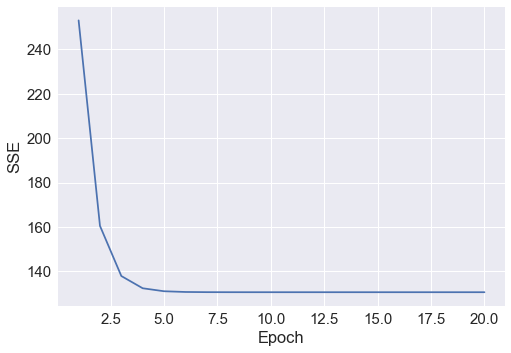

In [14]:
# checking if the linear regression has converged 
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [15]:
# visualizing how well the linear regression line fits the training data 
def lin_regplot(x, y, model):
    plt.scatter(x, y, c='blue')
    plt.plot(x, model.predict(x), color='red')
    return None


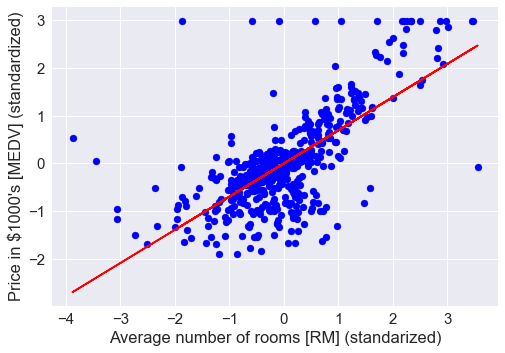

In [16]:
# lin_regplot function to plot the number of rooms against house prices

lin_regplot(x_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standarized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()


In [17]:
num_rooms_std = sc_x.transform([5.0])
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


/Users/toul/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [18]:
# don't have to update the weights of the intercepts 
print('Slope: %.3f' % lr.w_[1])
print('Interecept: %.3f' % lr.w_[0])


Slope: 0.695
Interecept: -0.000


In [19]:
# ESTIMATING THE COEFFICIENT OF A REGRESSION MODEL VIA SCIKIT-LEARN
# using the LIBLINEAR library w/optimized algorithms

from sklearn.linear_model import LinearRegression 
slr = LinearRegression()
slr.fit(x,y)
print('Slope: %.3f' % slr.coef_[0])
print('Interecept: %.3f' % slr.intercept_)
# yields different model weights 

Slope: 9.102
Interecept: -34.671


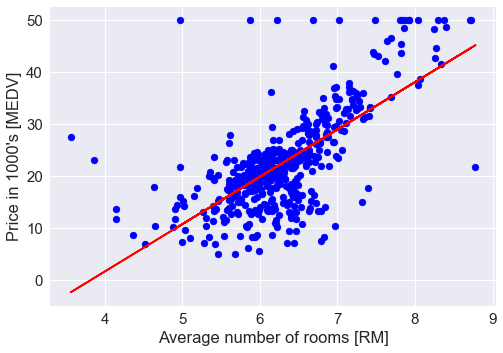

In [21]:
lin_regplot(x,y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in 1000\'s [MEDV]')
plt.show()

In [22]:
# Fitting a robust regression model using RANSAC
# the linear regression models are heavily impacted by the presence of outliers 
# RANSAC => RANdom SAmple Consensus
# 1. Selects a random number of samples to be inliers and fit the model
# 2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance 
#    to the inliers
# 3. Refit the model using all inliers 
# 4. Estimate the error of the fitted model versus the inliers 
# 5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations
#    hase been reached; go back to step 1 otherwise


In [25]:
# employing RANSAC

from sklearn.linear_model import RANSACRegressor 
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, residual_metric=lambda x: np.sum(np.abs(x), axis=1), residual_threshold=5.0, random_state=0)

ransac.fit(x,y)

/Users/toul/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x11d6ea598>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

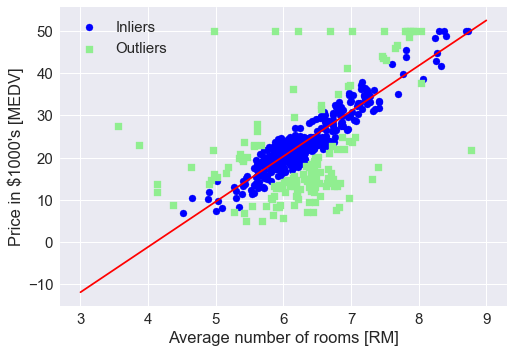

In [27]:
# inliers and outliers 
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_x = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_x[:, np.newaxis])
plt.scatter(x[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(x[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_x, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [28]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


/Users/toul/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


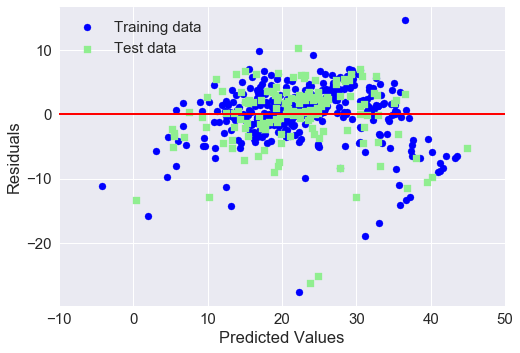

In [29]:
# EVALUATING THE PERFORAMANCE OF LINEAR REGRESSION MODELS 
# > Training a multiple regression model 
from sklearn.cross_validation import train_test_split
x = df.iloc[:, :-1].values 
y = df['MEDV'].values 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

slr = LinearRegression()
slr.fit(x_train, y_train)
y_train_pred = slr.predict(x_train)
y_test_pred = slr.predict(x_test)


# residual plot: subtract true target variables from our predicted responses 
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

In [31]:
# Mean Squared Error, avg. value of the SSE const, is useful for comparing the different regression models 

from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))



MSE train: 19.958, test: 27.196


In [32]:
# because test is 27.2 => is overfitting the data 
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


In [33]:
# will fit perfectly if MSE = 0 


In [35]:
# USING REGULARIZED METHODS FOR REGRESSION 

# ridge regression model 

from sklearn.linear_model import Ridge 
ridge = Ridge(alpha=1.0)

# LASSO
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=1.0)

# ElasticNet 
from sklearn.linear_model import ElasticNet
lasso = ElasticNet(alpha=1.0, l1_ratio=0.5)



In [36]:
# TURNING A LINEAR REGRESSION MODEL INTO A CURVE--POLYNOMIAL REGRESSION 


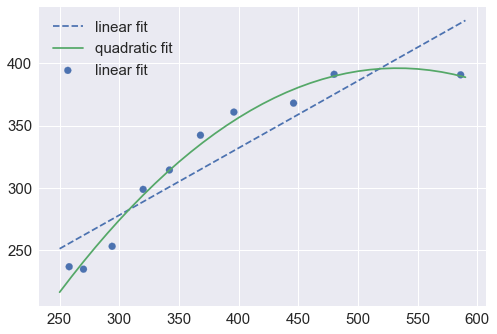

In [37]:
# 1. Add a second degree polynomial term 
from sklearn.preprocessing import PolynomialFeatures 
x = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
x_quad = quadratic.fit_transform(x)

# 2. Fit a simple linear regression model comparison 
lr.fit(x, y)
x_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(x_fit)


# 3. Fit a multiple regression model on the transformed features for polynomial regression
pr.fit(x_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(x_fit))
plt.scatter(x, y, label='linear fit', linestyle='--')
plt.plot(x_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(x_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()



In [38]:
y_lin_pred = lr.predict(x)
y_quad_pred = pr.predict(x_quad)
print('Training R^2 linear: %.3f, quadratic: %.3f' % (mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))
print('Traning R^2 linear: %.3f, quadratic: %.3f' % (r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))



Training R^2 linear: 569.780, quadratic: 61.330
Traning R^2 linear: 0.832, quadratic: 0.982


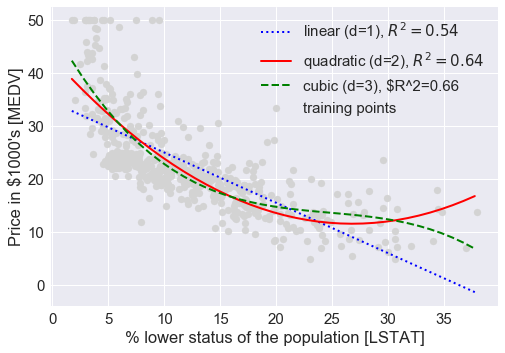

In [39]:
# MODELING NONLINEAR RELATIONSHIPS IN THE HOUSING DATASETS
x = df[['LSTAT']].values
y = df['MEDV'].values 
regr = LinearRegression()

# create polynomial features 
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
x_quad = quadratic.fit_transform(x)
x_cubic = cubic.fit_transform(x)

# linear fit 
x_fit = np.arange(x.min(), x.max(), 1)[:, np.newaxis]
regr = regr.fit(x, y)
y_lin_fit = regr.predict(x_fit)
linear_r2 = r2_score(y, regr.predict(x))


# quadratic fit 
regr = regr.fit(x_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(x_fit))
quadratic_r2 = r2_score(y, regr.predict(x_quad))


# cubic fit
regr = regr.fit(x_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(x_fit))
cubic_r2 = r2_score(y, regr.predict(x_cubic))



# plot results 
plt.scatter(x, y, label='training points', color='lightgray')
plt.plot(x_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(x_fit, y_quad_fit, label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(x_fit, y_cubic_fit, label='cubic (d=3), $R^2=%.2f' % cubic_r2, color='green', lw=2, linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
plt.show()


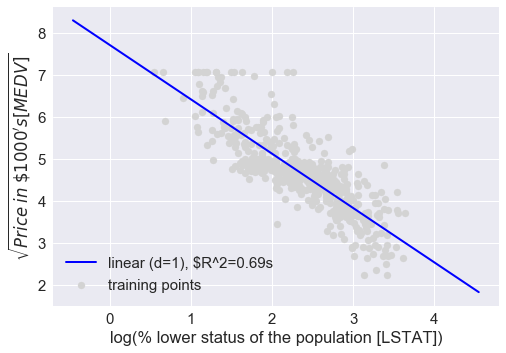

In [40]:
# adding more powers increases the likelihood for overfitting so be careful
# however, maybe a log transformation will be better
# transform the features 

x_log = np.log(x)
y_sqrt = np.sqrt(y)

# fit features 
x_fit = np.arange(x_log.min()-1, x_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(x_log, y_sqrt)
y_lin_fit = regr.predict(x_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(x_log))

# plot results 
plt.scatter(x_log, y_sqrt, label='training points', color='lightgray')
plt.plot(x_fit, y_lin_fit, label='linear (d=1), $R^2=%.2fs' % linear_r2, color='blue', lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')
plt.show()

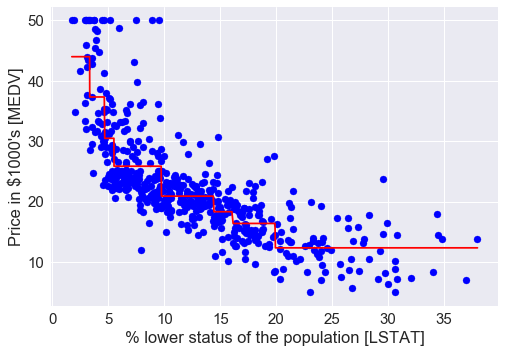

In [41]:
# DEALING WITH NONLINEAR RELATIONSHIPS USING RANDOM FORESTS 
# sum of piecewise linear functions 
# subdividing the input space into smaller regions that become more manageable
from sklearn.tree import DecisionTreeRegressor
x = df[['LSTAT']].values 
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(x, y)
sort_idx = x.flatten().argsort()
lin_regplot(x[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

In [44]:
# RANDOM FOREST REGRESSION
x = df.iloc[:, :-1].values 
y = df['MEDV'].values 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(x_train, y_train)
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))


MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878


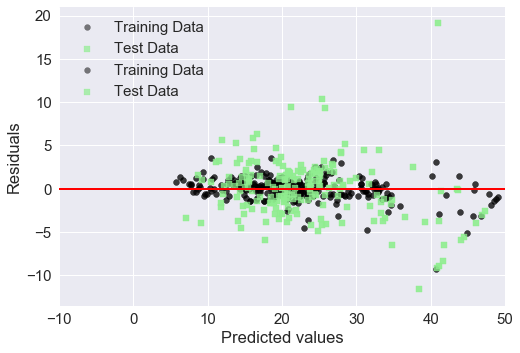

In [47]:
# overfit the training data 
# does well on the test data

plt.scatter(y_train_pred, y_train_pred-y_train, c='black', marker='o', s=35, alpha=0.5, label='Training Data')

plt.scatter(y_test_pred, y_test_pred-y_test, c='lightgreen', marker='s', s=35, alpha=0.7, label='Test Data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

In [ ]:
# handles the outliers well, the line fits the cluster well